In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data processing and EDA of ipl dataset

In [2]:
df=pd.read_csv('ODI_matches.csv')

In [3]:
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


In [4]:
df.tail()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
3927,ODI # 3928,India,New Zealand,New Zealand,6 wickets,Mumbai,"Oct 22, 2017"
3928,ODI # 3929,South Africa,Bangladesh,South Africa,200 runs,East London,"Oct 22, 2017"
3929,ODI # 3930,Pakistan,Sri Lanka,Pakistan,9 wickets,Sharjah,"Oct 23, 2017"
3930,ODI # 3931,India,New Zealand,India,6 wickets,Pune,"Oct 25, 2017"
3931,ODI # 3932,India,New Zealand,India,6 runs,Kanpur,"Oct 29, 2017"


In [5]:
# Checking rows and columns
df.shape

(3932, 7)

In [6]:
# Checking information od data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3932 entries, 0 to 3931
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Scorecard   3932 non-null   object
 1   Team 1      3932 non-null   object
 2   Team 2      3932 non-null   object
 3   Winner      3932 non-null   object
 4   Margin      3753 non-null   object
 5   Ground      3932 non-null   object
 6   Match Date  3932 non-null   object
dtypes: object(7)
memory usage: 215.2+ KB


In [7]:
df.isnull().sum()


Scorecard       0
Team 1          0
Team 2          0
Winner          0
Margin        179
Ground          0
Match Date      0
dtype: int64

In [8]:
df['Margin']=df['Margin'].fillna('Tied')

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,Scorecard,Team 1,Team 2,Winner,Margin,Ground,Match Date
0,ODI # 1,Australia,England,Australia,5 wickets,Melbourne,"Jan 5, 1971"
1,ODI # 2,England,Australia,England,6 wickets,Manchester,"Aug 24, 1972"
2,ODI # 3,England,Australia,Australia,5 wickets,Lord's,"Aug 26, 1972"
3,ODI # 4,England,Australia,England,2 wickets,Birmingham,"Aug 28, 1972"
4,ODI # 5,New Zealand,Pakistan,New Zealand,22 runs,Christchurch,"Feb 11, 1973"


# EDA

Text(0.5, 1.0, 'Number of Matches played  vs  Ground')

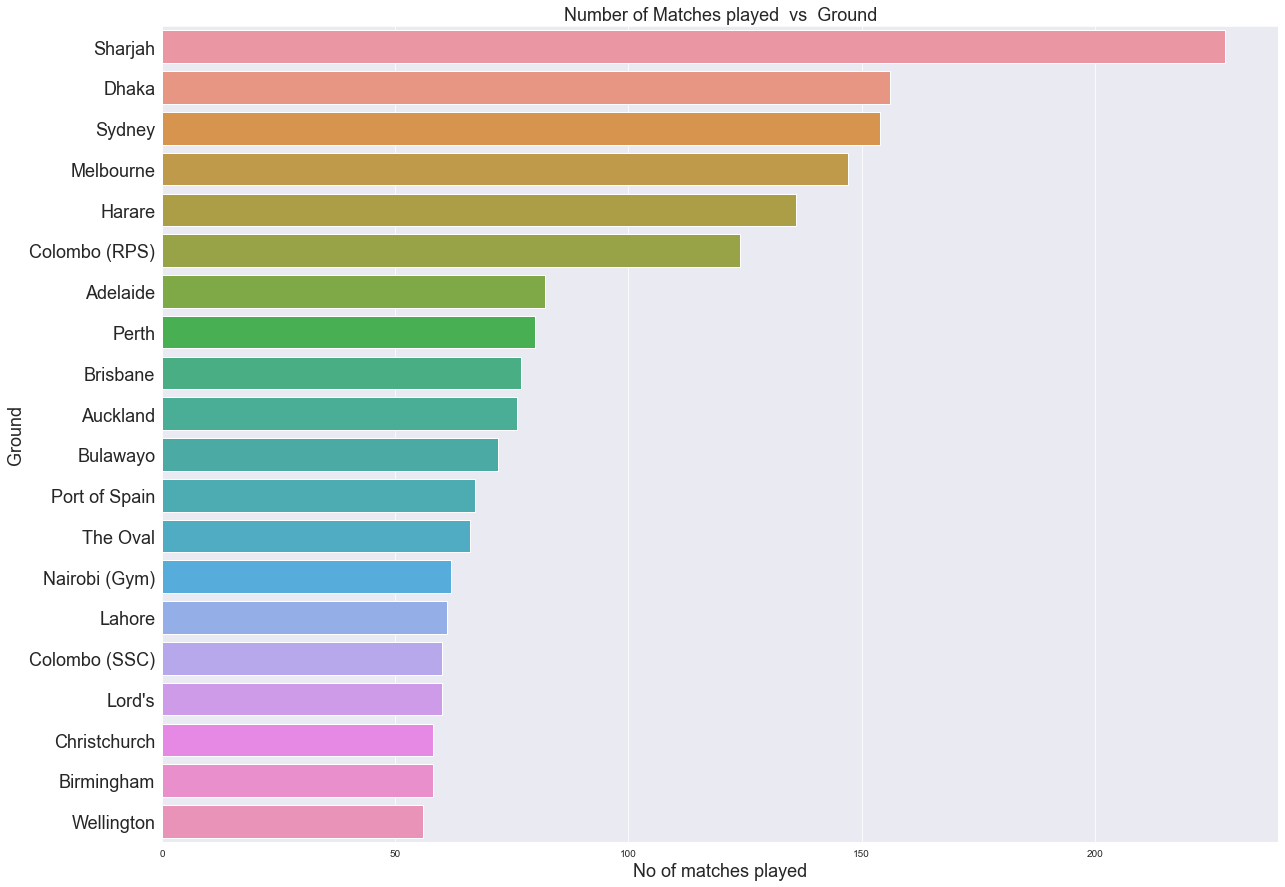

In [55]:
plt.figure(figsize=(20,15))
values=df.Ground.value_counts().sort_values(ascending=False).head(20)
labels=values.index
sns.barplot(x=values,y=labels)
plt.yticks(fontsize=18)
plt.ylabel('Ground',fontsize=18)
plt.xlabel('No of matches played',fontsize=18)
plt.title('Number of Matches played  vs  Ground',fontsize=18)

## most matches played at sharjah ground

In [13]:
df.isnull().sum()

Scorecard     0
Team 1        0
Team 2        0
Winner        0
Margin        0
Ground        0
Match Date    0
dtype: int64

In [116]:
df1=df['Winner'].value_counts().index[0:10]
df1

Index(['Australia', 'India', 'Pakistan', 'West Indies', 'Sri Lanka',
       'South Africa', 'England', 'New Zealand', 'no result', 'Zimbabwe'],
      dtype='object')

In [117]:
x,y=df.shape
winner_count = df.loc[:,["Winner","Scorecard"]].groupby("Winner").count()
winner_count["Percentage"] = round(winner_count["Scorecard"]*100/x,0);
winner_count = winner_count.sort_values("Scorecard",ascending=False)
winner_count

,Scorecard,Percentage
Winner,,
Australia,555,14.0
India,476,12.0
Pakistan,469,12.0
West Indies,380,10.0
Sri Lanka,372,9.0
South Africa,361,9.0
England,343,9.0
New Zealand,324,8.0
no result,140,4.0


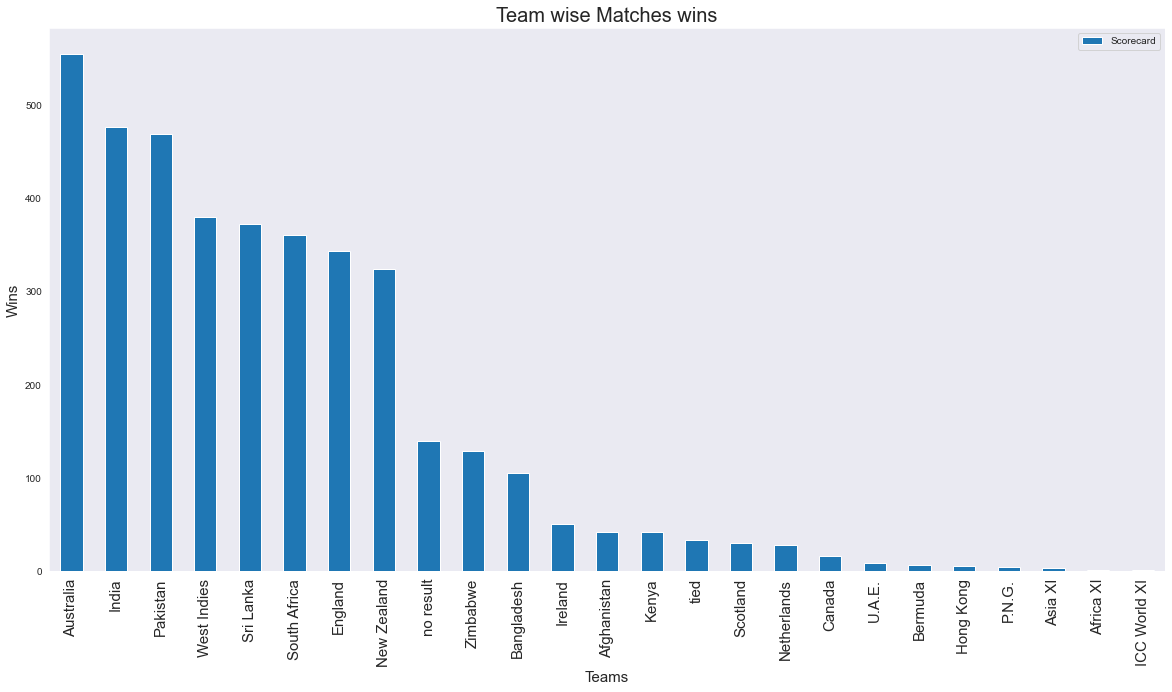

In [80]:
winner_count.iloc[:,0:1].plot(kind="bar",figsize=(20,10))
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("Wins",fontsize=15)
plt.title("Team wise Matches wins",fontsize=20)
plt.grid();

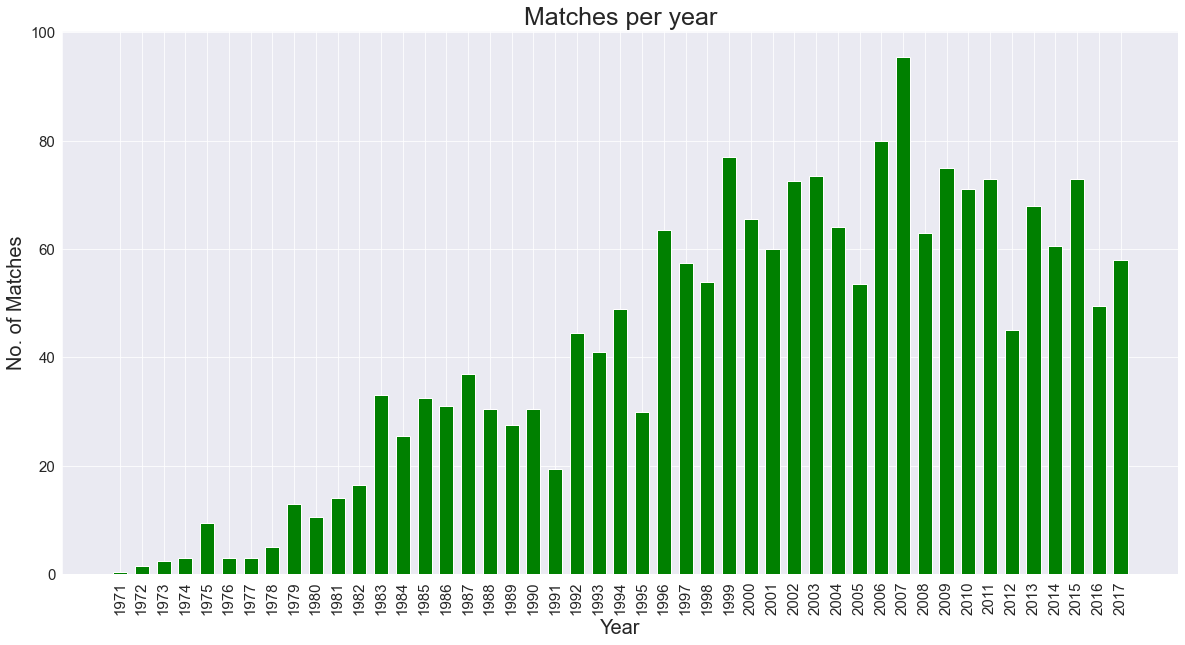

In [79]:
df['Year'] = df['Match Date'].str[-4:]
yearwise = df[['Year']].value_counts()/2
yearwise = yearwise.reset_index()
yearwise.columns =['Year', 'Matches']
yearwise =yearwise.sort_values(by='Year', ascending=True)
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
plt.bar(yearwise['Year'], yearwise['Matches'], width=0.65, color='Green')
plt.xticks(rotation='vertical', size=15)
plt.yticks(size=15)
plt.xlabel('Year', size=20)
plt.ylabel('No. of Matches', size=20)
plt.title('Matches per year', size=25);

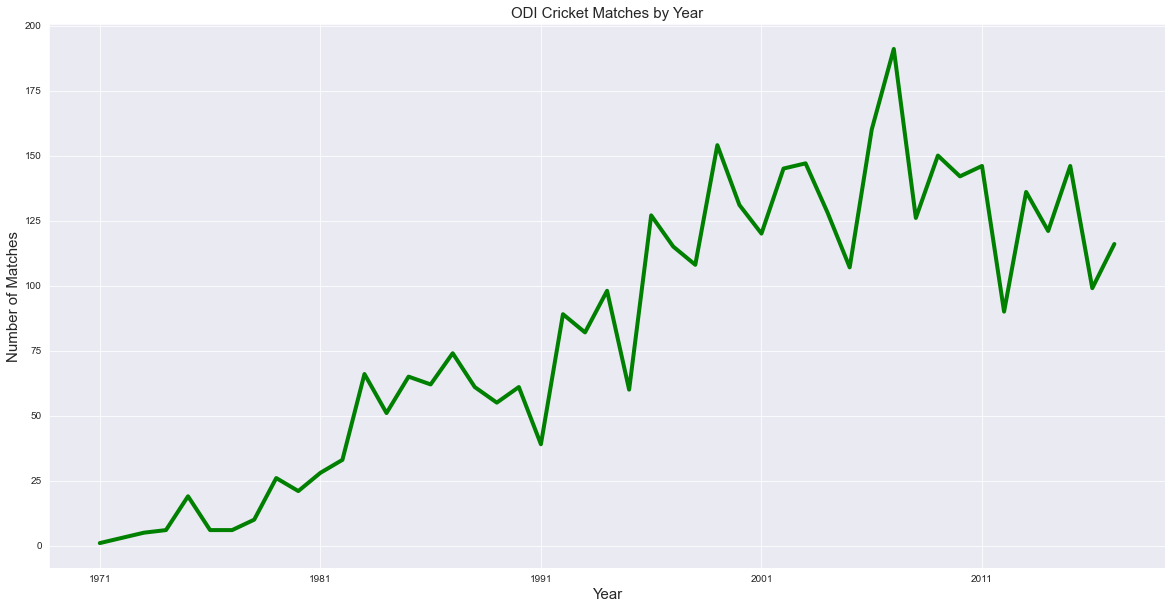

In [78]:
plt.figure(figsize=(20,10))
year=df.groupby("Year").size()
year.plot(kind="line",color="green",linewidth=4)
plt.title("ODI Cricket Matches by Year",fontsize=15)
plt.ylabel("Number of Matches",fontsize=15)
plt.xlabel("Year",fontsize=15);